In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import os



In [155]:
csv_path_CHR = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\CHR\*.csv'
csv_path_HC = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\HC\*.csv'

In [156]:
df1 = pd.read_csv(r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\CHR\3022post-cut-gesture.csv')

In [157]:
df1.head(5)

,time_in_seconds,frame,total_movement_per_second,pose_openness,leaning,head_horizontal,head_vertical,left_arm_angle,left_arm_v_movement,left_arm_h_movement,right_arm_angle,right_arm_v_movement,right_arm_h_movement,left_hand_orientation,left_hand_state,right_hand_orientation,right_hand_state
0,1.0,59,5.670281,1.457968,Backward,STILL,STILL,41.430605,NaN,FORWARD,36.005718,UP,FORWARD,Up,OPEN,Up,OPEN
1,2.0,118,1.097724,1.516803,Backward,RIGHT,DOWN,52.861229,NaN,FORWARD,29.544660,UP,FORWARD,Up,OPEN,Up,OPEN
2,3.0,177,0.257858,1.476419,Backward,STILL,DOWN,43.668879,NaN,FORWARD,32.406634,UP,FORWARD,Up,OPEN,Up,OPEN
3,4.0,236,0.283107,1.419914,Backward,LEFT,STILL,43.073340,NaN,FORWARD,27.776437,UP,FORWARD,Up,OPEN,Up,OPEN
4,5.0,295,0.650991,1.496601,Backward,RIGHT,DOWN,50.107532,NaN,FORWARD,85.047472,UP,FORWARD,Up,OPEN,Down,OPEN


In [158]:
df1.describe

<bound method NDFrame.describe of      time_in_seconds  frame  total_movement_per_second  pose_openness   
0                1.0     59                   5.670281       1.457968  \
1                2.0    118                   1.097724       1.516803   
2                3.0    177                   0.257858       1.476419   
3                4.0    236                   0.283107       1.419914   
4                5.0    295                   0.650991       1.496601   
..               ...    ...                        ...            ...   
299            300.0  17700                   0.314887       1.767795   
300            301.0  17759                   0.395761       1.372370   
301            302.0  17818                   0.273666       1.354969   
302            303.0  17877                   0.124758       1.337673   
303            304.0  17936                   0.260511       1.462341   

      leaning head_horizontal head_vertical  left_arm_angle   
0    Backward           ST

In [159]:
# Initialize empty lists
pose_opennessCHR = []
# Iterate over each CSV file in the specified path
for file in glob.glob(csv_path_CHR):
    dfCHR = pd.read_csv(file)
    
    # Check if 'total_movement_over_time' column exists in the DataFrame
    if 'pose_openness' in dfCHR.columns:
        column = dfCHR['pose_openness']
        pose_opennessCHR.extend(column)

# Initialize empty lists
pose_opennessHC = []

# Iterate over each CSV file in the specified path
for file in glob.glob(csv_path_HC):
    dfHC = pd.read_csv(file)
    
    # Check if 'total_movement_over_time' column exists in the DataFrame
    if 'pose_openness' in dfHC.columns:
        column = dfHC['pose_openness']
        pose_opennessHC.extend(column)



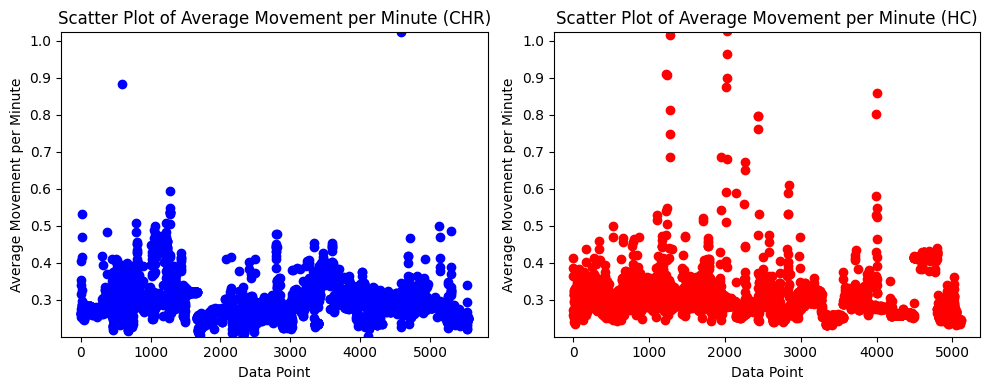

In [160]:
# Calculate the time duration in minutes
time_duration_chr = 5
time_duration_hc = 5

# Calculate the average movement per minute
avg_movement_per_minute_chr = [movement / time_duration_chr for movement in pose_opennessCHR]
avg_movement_per_minute_hc = [movement / time_duration_hc for movement in pose_opennessHC]

# Determine the y-axis limits based on CHR dataset
y_min = min(avg_movement_per_minute_chr)
y_max = max(avg_movement_per_minute_chr)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the scatter plot for CHR
axs[0].scatter(range(len(avg_movement_per_minute_chr)), avg_movement_per_minute_chr, c='blue')
axs[0].set_xlabel('Data Point')
axs[0].set_ylabel('Average Movement per Minute')
axs[0].set_title('Scatter Plot of Average Movement per Minute (CHR)')
axs[0].set_ylim(y_min, y_max)

# Plot the scatter plot for HC
axs[1].scatter(range(len(avg_movement_per_minute_hc)), avg_movement_per_minute_hc, c='red')
axs[1].set_xlabel('Data Point')
axs[1].set_ylabel('Average Movement per Minute')
axs[1].set_title('Scatter Plot of Average Movement per Minute (HC)')
axs[1].set_ylim(y_min, y_max)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


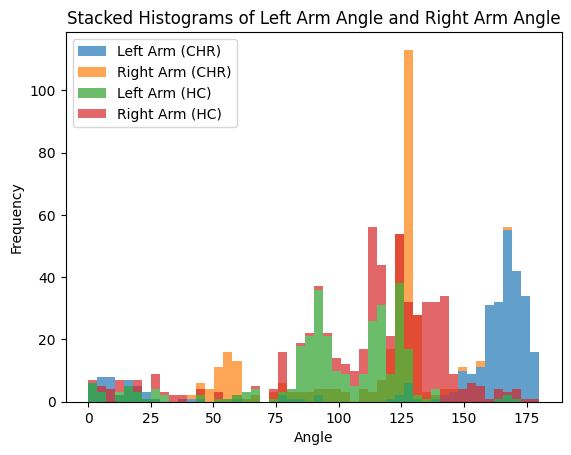

In [161]:
# Select the 'left_arm_angle' and 'right_arm_angle' columns from dfCHR and dfHC
columns = ['left_arm_angle', 'right_arm_angle']
selected_dfCHR = dfCHR[columns]
selected_dfHC = dfHC[columns]

# Set the bin edges for the histograms
bin_edges = np.linspace(0, 180, 51)  # Modify the range and number of bins as desired

# Create stacked histograms for the selected columns
plt.hist([selected_dfCHR['left_arm_angle'], selected_dfCHR['right_arm_angle']],
         bins=bin_edges, stacked=True, label=['Left Arm (CHR)', 'Right Arm (CHR)'], alpha=0.7)

plt.hist([selected_dfHC['left_arm_angle'], selected_dfHC['right_arm_angle']],
         bins=bin_edges, stacked=True, label=['Left Arm (HC)', 'Right Arm (HC)'], alpha=0.7)

# Set labels and title for the histogram
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('Stacked Histograms of Left Arm Angle and Right Arm Angle')

# Add legend
plt.legend()

# Show the histogram
plt.show()


In [162]:
dfCHR.head(15)

,time_in_seconds,frame,total_movement_per_second,pose_openness,leaning,head_horizontal,head_vertical,left_arm_angle,left_arm_v_movement,left_arm_h_movement,right_arm_angle,right_arm_v_movement,right_arm_h_movement,left_hand_orientation,left_hand_state,right_hand_orientation,right_hand_state
0,1.0,29,2.026983,1.309405,Backward,RIGHT,UP,169.102871,DOWN,FORWARD,114.678245,NaN,FORWARD,Down,OPEN,Down,OPEN
1,2.0,58,3.151567,1.226003,Backward,RIGHT,UP,165.057394,DOWN,FORWARD,148.792246,NaN,FORWARD,Down,OPEN,Right,OPEN
2,3.0,87,2.001258,1.234973,Backward,LEFT,DOWN,174.953937,DOWN,CALCULATING,124.745306,NaN,FORWARD,Down,OPEN,Right,OPEN
3,4.0,116,3.444853,1.209163,Backward,RIGHT,STILL,170.364001,DOWN,FORWARD,47.973907,NaN,FORWARD,Up,OPEN,Up,OPEN
4,5.0,145,0.376378,1.199647,Backward,STILL,STILL,172.670082,DOWN,FORWARD,54.007824,NaN,FORWARD,Up,OPEN,Up,OPEN
5,6.0,174,0.597295,1.206593,Backward,RIGHT,DOWN,173.511670,DOWN,FORWARD,46.873975,NaN,FORWARD,Up,OPEN,Up,OPEN
6,7.0,203,0.431425,1.218964,Backward,LEFT,DOWN,175.090890,DOWN,FORWARD,45.459494,NaN,FORWARD,Up,OPEN,Up,OPEN
7,8.0,232,0.403095,1.246846,Backward,STILL,STILL,173.504878,DOWN,FORWARD,44.434912,NaN,FORWARD,Up,OPEN,Up,OPEN
8,9.0,261,0.289229,1.240958,Backward,RIGHT,STILL,173.702850,DOWN,FORWARD,45.505938,NaN,FORWARD,Up,OPEN,Up,OPEN
9,10.0,290,0.996857,1.252159,Backward,RIGHT,UP,169.238976,DOWN,FORWARD,55.028914,NaN,FORWARD,Up,OPEN,Up,OPEN


In [163]:
# Drop NaN values from the DataFrame
dfCHR.dropna(inplace=True)

# Define a mapping of string values to numerical codes
mapping = {
    'leaning': {'Backward': 0, 'Forward': 1},
    'head_horizontal': {'STILL': 0, 'RIGHT': 1, 'LEFT': 2},
    'head_vertical': {'STILL': 0, 'DOWN': 1, 'UP': 2},
    'left_arm_v_movement': {'UP': 0, 'DOWN': 1},
    'right_arm_v_movement': {'UP': 0, 'DOWN': 1},
    'left_arm_h_movement': {'CALCULATING': 0, 'FORWARD': 1},
    'right_arm_h_movement': {'CALCULATING': 0, 'FORWARD': 1},
    'left_hand_orientation': {'Right': 0, 'Left': 1, 'Up': 2, 'Down': 3},
    'left_hand_state': {'CLOSED': 0, 'OPEN': 1},
    'right_hand_orientation': {'Right': 0, 'Left': 1, 'Up': 2, 'Down': 3},
    'right_hand_state': {'CLOSED': 0, 'OPEN': 1}
}

# Encode the string columns with numerical codes
for column in mapping:
    dfCHR[column + '_code'] = dfCHR[column].map(mapping[column])
dfCHR.head(5)

,time_in_seconds,frame,total_movement_per_second,pose_openness,leaning,head_horizontal,head_vertical,left_arm_angle,left_arm_v_movement,left_arm_h_movement,...,head_horizontal_code,head_vertical_code,left_arm_v_movement_code,right_arm_v_movement_code,left_arm_h_movement_code,right_arm_h_movement_code,left_hand_orientation_code,left_hand_state_code,right_hand_orientation_code,right_hand_state_code
11,12.0,348,1.502954,1.534679,Backward,STILL,DOWN,161.120273,DOWN,CALCULATING,...,0,1,1,1,0,0,0,1,0,1
12,13.0,377,1.836272,1.260999,Backward,LEFT,DOWN,173.117658,DOWN,FORWARD,...,2,1,1,1,1,1,0,1,0,1
13,14.0,406,1.477248,1.364578,Backward,LEFT,DOWN,151.048599,DOWN,FORWARD,...,2,1,1,1,1,1,3,1,3,1
14,15.0,435,0.984385,1.553596,Backward,RIGHT,STILL,154.791004,DOWN,CALCULATING,...,1,0,1,1,0,1,3,1,3,1
15,16.0,464,1.176553,1.450598,Backward,LEFT,STILL,177.435368,DOWN,CALCULATING,...,2,0,1,1,0,1,2,1,2,1


In [164]:
# Drop NaN values from the DataFrame
dfHC.dropna(inplace=True)

# Define a mapping of string values to numerical codes
mapping = {
    'leaning': {'Backward': 0, 'Forward': 1},
    'head_horizontal': {'STILL': 0, 'RIGHT': 1, 'LEFT': 2},
    'head_vertical': {'STILL': 0, 'DOWN': 1, 'UP': 2},
    'left_arm_v_movement': {'UP': 0, 'DOWN': 1},
    'right_arm_v_movement': {'UP': 0, 'DOWN': 1},
    'left_arm_h_movement': {'CALCULATING': 0, 'FORWARD': 1},
    'right_arm_h_movement': {'CALCULATING': 0, 'FORWARD': 1},
    'left_hand_orientation': {'Right': 0, 'Left': 1, 'Up': 2, 'Down': 3},
    'left_hand_state': {'CLOSED': 0, 'OPEN': 1},
    'right_hand_orientation': {'Right': 0, 'Left': 1, 'Up': 2, 'Down': 3},
    'right_hand_state': {'CLOSED': 0, 'OPEN': 1}
}

# Encode the string columns with numerical codes
for column in mapping:
    dfHC[column + '_code'] = dfHC[column].map(mapping[column])
dfHC.head(5)

,time_in_seconds,frame,total_movement_per_second,pose_openness,leaning,head_horizontal,head_vertical,left_arm_angle,left_arm_v_movement,left_arm_h_movement,...,head_horizontal_code,head_vertical_code,left_arm_v_movement_code,right_arm_v_movement_code,left_arm_h_movement_code,right_arm_h_movement_code,left_hand_orientation_code,left_hand_state_code,right_hand_orientation_code,right_hand_state_code
7,8.0,232,10.737611,1.459407,Backward,RIGHT,DOWN,82.705293,DOWN,FORWARD,...,1,1,1,1,1,1,3,1,2,1
8,9.0,261,2.323553,1.564475,Backward,LEFT,UP,0.706511,UP,FORWARD,...,2,2,0,1,1,1,2,1,3,1
9,10.0,290,1.058437,1.341910,Backward,STILL,DOWN,107.874783,UP,FORWARD,...,0,1,0,1,1,1,3,1,3,1
10,11.0,319,0.250061,1.369793,Backward,LEFT,STILL,103.804904,UP,FORWARD,...,2,0,0,1,1,1,3,1,3,1
11,12.0,348,0.174997,1.370171,Backward,STILL,STILL,102.551699,UP,FORWARD,...,0,0,0,1,1,1,3,1,3,1


In [165]:
dfHCnum = dfHC.drop(['leaning', 'head_horizontal', 'head_vertical', 'left_arm_v_movement',
                  'right_arm_v_movement', 'left_arm_h_movement', 'right_arm_h_movement',
                  'left_hand_orientation', 'right_hand_orientation', 'left_hand_state',
                  'right_hand_state'],
          axis=1)
dfCHRnum = dfCHR.drop(['leaning', 'head_horizontal', 'head_vertical', 'left_arm_v_movement',
                  'right_arm_v_movement', 'left_arm_h_movement', 'right_arm_h_movement',
                  'left_hand_orientation', 'right_hand_orientation', 'left_hand_state',
                  'right_hand_state'],
          axis=1)

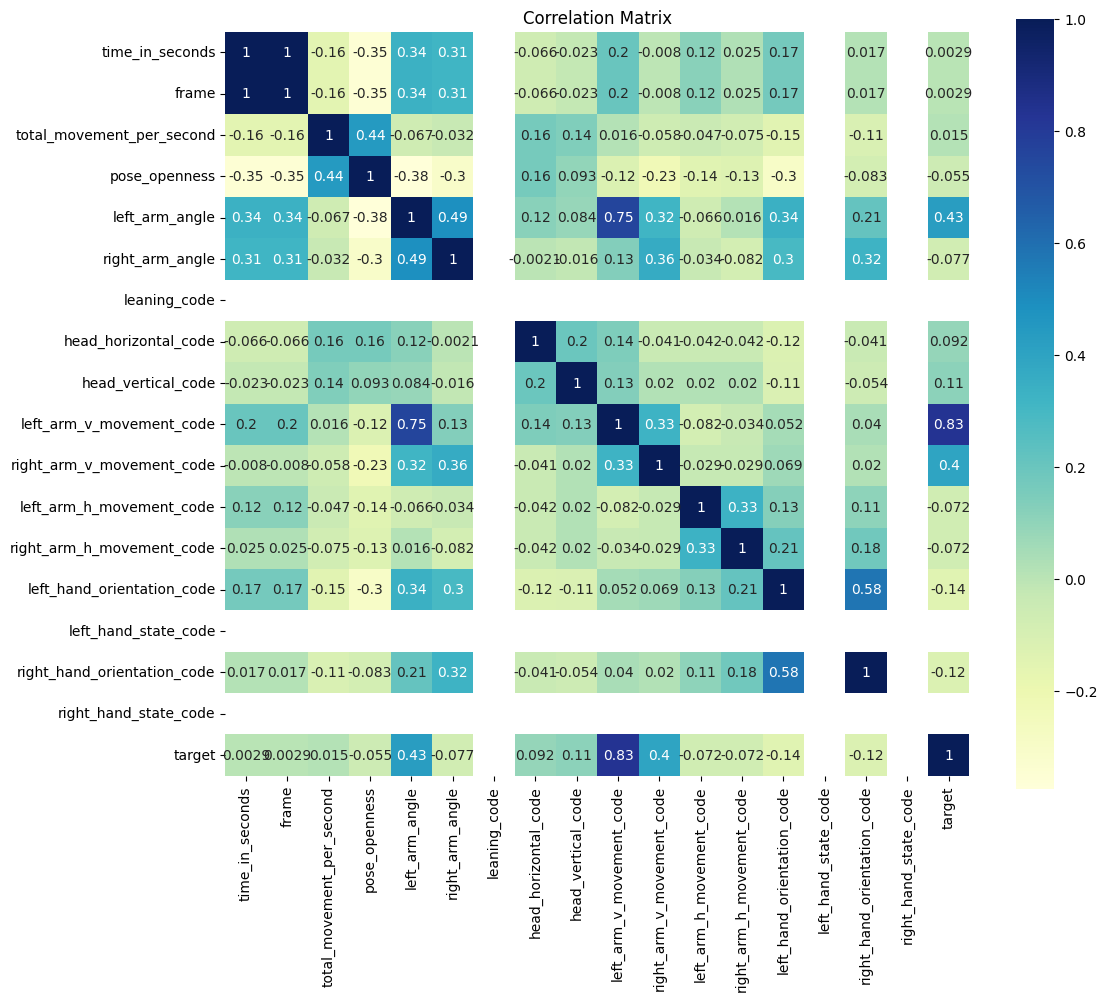

In [166]:
# Create a new column 'group' in each DataFrame
dfCHRnum['target'] = 1
dfHCnum['target'] = 0

# Merge the two DataFrames
merged_df = pd.concat([dfCHRnum, dfHCnum])

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', square=True)
plt.title('Correlation Matrix')
plt.show()


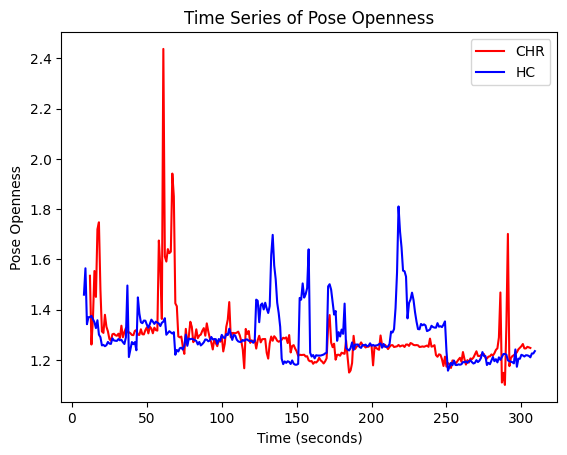

In [167]:
# Plotting time series for pose openness for CHR group
plt.plot(dfCHR['time_in_seconds'], dfCHR['pose_openness'], label='CHR', color='red')

# Plotting time series for pose openness for HC group
plt.plot(dfHC['time_in_seconds'], dfHC['pose_openness'], label='HC', color='blue')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Pose Openness')
plt.title('Time Series of Pose Openness')
plt.legend()

# Display the plot
plt.show()


In [168]:
!pip install bokeh

In [169]:
# Retrieve the file paths of the CSV files in CHR directory
csv_files_CHR = glob.glob(csv_path_CHR)

# Retrieve the file paths of the CSV files in HC directory
csv_files_HC = glob.glob(csv_path_HC)

# Function to extract video ID from file name
def extract_video_id(file_path):
    file_name = os.path.basename(file_path)
    video_id = file_name.split('-cut')[0]
    return video_id

# Create video IDs for CHR videos
video_ids_CHR = [extract_video_id(file_path) for file_path in csv_files_CHR]

# Create video IDs for HC videos
video_ids_HC = [extract_video_id(file_path) for file_path in csv_files_HC]

# Print the video IDs
print("CHR Video IDs:")
for video_id in video_ids_CHR:
    print(video_id)

print("\nHC Video IDs:")
for video_id in video_ids_HC:
    print(video_id)


CHR Video IDs:
11002
11007pt1
11007pt2
11007pt3
11008.1
11008.2
3005 12m clin
3005 12m clin2
3005 12m clin3
3013 12m pt1
3013 12m pt2
3019_12m
3022post
3023 12m pt1
3023 12m pt3
3024 p2post
3032 12m pt2
3034redo1post
3035
7107_1

HC Video IDs:
4003 12 mo p 2
4003 12 mo p1
4003 12 mo p3
4003 12 mo p4
4003
4003_12_4
4004 baseline
4005 clinical 1
4005_12mo
4006 clinical baseline
4007 and 12001
4008
4010
4010_12mo_1
4011
4054_1
4056_1


In [170]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
from bokeh.layouts import gridplot

# Set the output mode to notebook
output_notebook()

# Prepare the data for plotting
numerical_feats = ['left_arm_angle', 'right_arm_angle']
categorical_feats = ['leaning', 'head_horizontal', 'head_vertical']

# Function to extract video ID from file name
def extract_video_id(file_path):
    file_name = os.path.basename(file_path)
    video_id = file_name.split('-cut')[0]
    return video_id

# Retrieve the file paths of the CSV files in CHR directory

csv_files_CHR = glob.glob(csv_path_CHR)
video_ids_CHR = [extract_video_id(file_path) for file_path in csv_files_CHR]

# Retrieve the file paths of the CSV files in HC directory

csv_files_HC = glob.glob(csv_path_HC)
video_ids_HC = [extract_video_id(file_path) for file_path in csv_files_HC]

# Function to load CSV files and add 'video_id' column
def load_csv_files(csv_files):
    dfs = []
    for file_path in csv_files:
        video_id = extract_video_id(file_path)
        df = pd.read_csv(file_path)
        df['video_id'] = video_id
        dfs.append(df)
    return pd.concat(dfs)

# Load CHR CSV files
dfCHR = load_csv_files(csv_files_CHR)

# Load HC CSV files
dfHC = load_csv_files(csv_files_HC)



Loading BokehJS ...

In [171]:
# Define the folder paths
chr_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\CHR'
hc_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\HC'

# Define the colors for CHR and HC line plots
chr_color = 'blue'
hc_color = 'red'

# Create a Bokeh figure
p = figure(title='Left Arm Angle', x_axis_label='Time (seconds)', y_axis_label='Angle')

# Extract left arm angle values from CHR folder
chr_files = glob.glob(os.path.join(chr_folder, '*.csv'))
for file in chr_files:
    df = pd.read_csv(file)
    df['left_arm_angle'] = pd.to_numeric(df['left_arm_angle'], errors='coerce')  # Convert non-numeric values to NaN
    df = df.dropna(subset=['left_arm_angle'])  # Drop rows with NaN values in the 'left_arm_angle' column
    p.line(df['time_in_seconds'], df['left_arm_angle'], color=chr_color, legend_label='CHR')

# Extract left arm angle values from HC folder
hc_files = glob.glob(os.path.join(hc_folder, '*.csv'))
for file in hc_files:
    df = pd.read_csv(file)
    df['left_arm_angle'] = pd.to_numeric(df['left_arm_angle'], errors='coerce')  # Convert non-numeric values to NaN
    df = df.dropna(subset=['left_arm_angle'])  # Drop rows with NaN values in the 'left_arm_angle' column
    p.line(df['time_in_seconds'], df['left_arm_angle'], color=hc_color, legend_label='HC')

# Show the plot
show(p)


In [172]:
# Create a Bokeh figure
p = figure(title='Pose Openness', x_axis_label='Time (seconds)', y_axis_label='Openness')

# Extract pose openness values from CHR folder
chr_files = glob.glob(os.path.join(chr_folder, '*.csv'))
for file in chr_files:
    df = pd.read_csv(file)
    df['pose_openness'] = pd.to_numeric(df['pose_openness'], errors='coerce')  # Convert non-numeric values to NaN
    df = df.dropna(subset=['pose_openness'])  # Drop rows with NaN values in the 'pose_openness' column
    p.line(df['time_in_seconds'], df['pose_openness'], color=chr_color, legend_label='CHR')

# Extract pose openness values from HC folder
hc_files = glob.glob(os.path.join(hc_folder, '*.csv'))
for file in hc_files:
    df = pd.read_csv(file)
    df['pose_openness'] = pd.to_numeric(df['pose_openness'], errors='coerce')  # Convert non-numeric values to NaN
    df = df.dropna(subset=['pose_openness'])  # Drop rows with NaN values in the 'pose_openness' column
    p.line(df['time_in_seconds'], df['pose_openness'], color=hc_color, legend_label='HC')

# Show the plot
show(p)


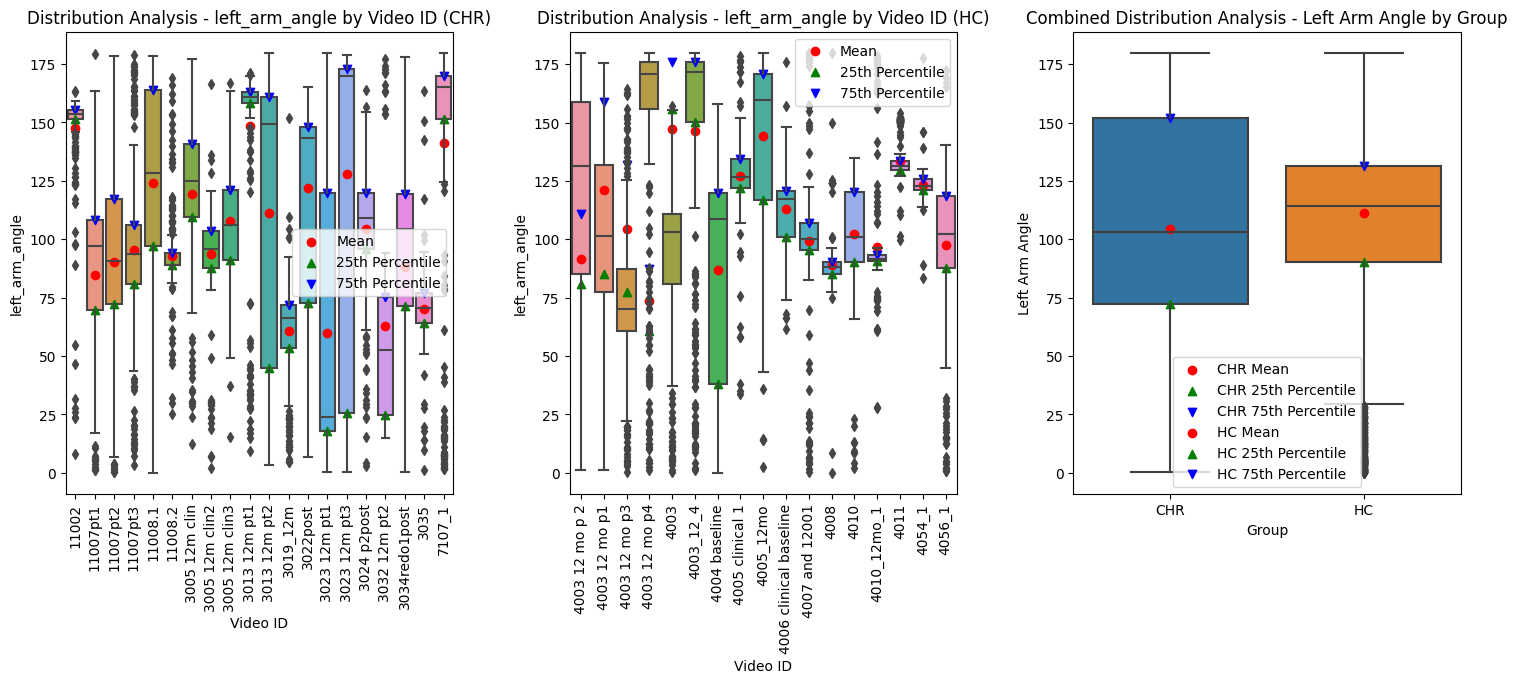


Group Statistics:
             mean        25%         75%
group                                   
CHR    104.416802  72.204868  151.975265
HC     111.338065  90.424108  131.394302


In [173]:
# Define the folder paths
csv_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles'
chr_folder = os.path.join(csv_folder, 'CHR')
hc_folder = os.path.join(csv_folder, 'HC')

# Function to extract video ID from file name
def extract_video_id(file):
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    # Extract the video ID before '-cut' portion
    video_id = file_name.split('-cut')[0]
    return video_id

# Function to create distribution analysis box plot for a group
def create_distribution_analysis_box_plot(folder, column, group_label, ax):
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder, '*.csv'))

    # Create an empty list to store the dataframes
    dataframes = []

    # Read each CSV file, assign video ID, and append its dataframe to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['video_id'] = extract_video_id(file)
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dataframes)

    # Group by video ID and calculate mean and percentiles
    group_stats = combined_df.groupby('video_id')[column].describe()[['mean', '25%', '75%']]

    # Plotting
    sns.boxplot(x='video_id', y=column, data=combined_df, ax=ax)
    ax.scatter(group_stats.index, group_stats['mean'], marker='o', color='red', label='Mean')
    ax.scatter(group_stats.index, group_stats['25%'], marker='^', color='green', label='25th Percentile')
    ax.scatter(group_stats.index, group_stats['75%'], marker='v', color='blue', label='75th Percentile')
    ax.set_xlabel('Video ID')
    ax.set_ylabel(column)
    ax.set_title(f'Distribution Analysis - {column} by Video ID ({group_label})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - left_arm_angle
create_distribution_analysis_box_plot(chr_folder, 'left_arm_angle', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - left_arm_angle
create_distribution_analysis_box_plot(hc_folder, 'left_arm_angle', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - left_arm_angle
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Add group labels
chr_combined_df['group'] = 'CHR'
hc_combined_df['group'] = 'HC'

# Combine both group dataframes
combined_df = pd.concat([chr_combined_df, hc_combined_df])

# Calculate mean and percentiles for the combined group
group_stats = combined_df.groupby('group')['left_arm_angle'].describe()[['mean', '25%', '75%']]

# Plotting combined graph
sns.boxplot(data=combined_df, x='group', y='left_arm_angle', ax=axes[2])
axes[2].scatter([0], group_stats.loc['CHR', 'mean'], marker='o', color='red', label='CHR Mean')
axes[2].scatter([0], group_stats.loc['CHR', '25%'], marker='^', color='green', label='CHR 25th Percentile')
axes[2].scatter([0], group_stats.loc['CHR', '75%'], marker='v', color='blue', label='CHR 75th Percentile')
axes[2].scatter([1], group_stats.loc['HC', 'mean'], marker='o', color='red', label='HC Mean')
axes[2].scatter([1], group_stats.loc['HC', '25%'], marker='^', color='green', label='HC 25th Percentile')
axes[2].scatter([1], group_stats.loc['HC', '75%'], marker='v', color='blue', label='HC 75th Percentile')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Left Arm Angle')
axes[2].set_title('Combined Distribution Analysis - Left Arm Angle by Group')
axes[2].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()
# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


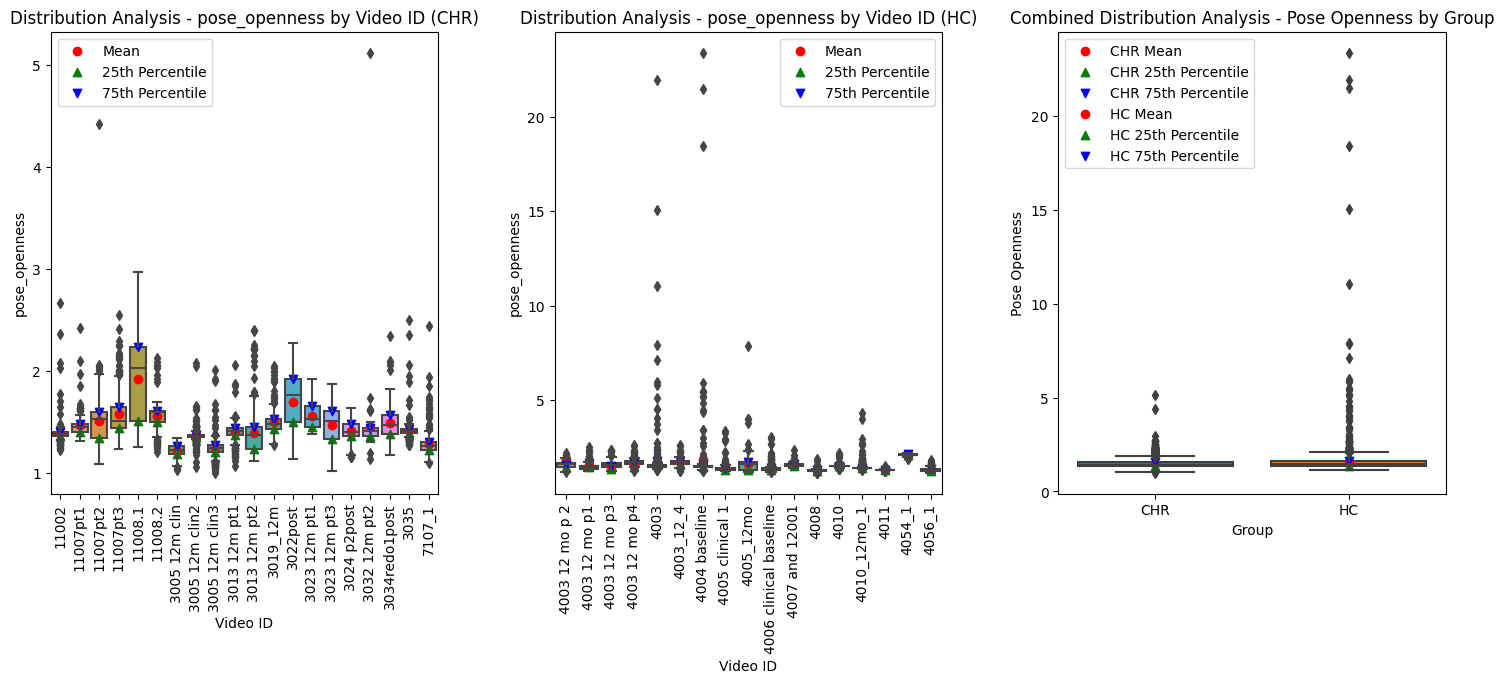


Group Statistics:
           mean       25%       75%
group                              
CHR    1.472675  1.348042  1.555109
HC     1.564355  1.348541  1.639668


In [174]:
# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - pose_openness
create_distribution_analysis_box_plot(chr_folder, 'pose_openness', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - pose_openness
create_distribution_analysis_box_plot(hc_folder, 'pose_openness', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - pose_openness
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Add group labels
chr_combined_df['group'] = 'CHR'
hc_combined_df['group'] = 'HC'

# Combine both group dataframes
combined_df = pd.concat([chr_combined_df, hc_combined_df])

# Calculate mean and percentiles for the combined group
group_stats = combined_df.groupby('group')['pose_openness'].describe()[['mean', '25%', '75%']]

# Plotting combined graph
sns.boxplot(data=combined_df, x='group', y='pose_openness', ax=axes[2])
axes[2].scatter([0], group_stats.loc['CHR', 'mean'], marker='o', color='red', label='CHR Mean')
axes[2].scatter([0], group_stats.loc['CHR', '25%'], marker='^', color='green', label='CHR 25th Percentile')
axes[2].scatter([0], group_stats.loc['CHR', '75%'], marker='v', color='blue', label='CHR 75th Percentile')
axes[2].scatter([1], group_stats.loc['HC', 'mean'], marker='o', color='red', label='HC Mean')
axes[2].scatter([1], group_stats.loc['HC', '25%'], marker='^', color='green', label='HC 25th Percentile')
axes[2].scatter([1], group_stats.loc['HC', '75%'], marker='v', color='blue', label='HC 75th Percentile')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Pose Openness')
axes[2].set_title('Combined Distribution Analysis - Pose Openness by Group')
axes[2].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()
# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


C:\Users\rcz8260\AppData\Local\Temp\ipykernel_64144\1995934734.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 1].set_xticklabels(['CHR', 'HC'])
C:\Users\rcz8260\AppData\Local\Temp\ipykernel_64144\1995934734.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 1].set_xticklabels(['CHR', 'HC'])
C:\Users\rcz8260\AppData\Local\Temp\ipykernel_64144\1995934734.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, 1].set_xticklabels(['CHR', 'HC'])


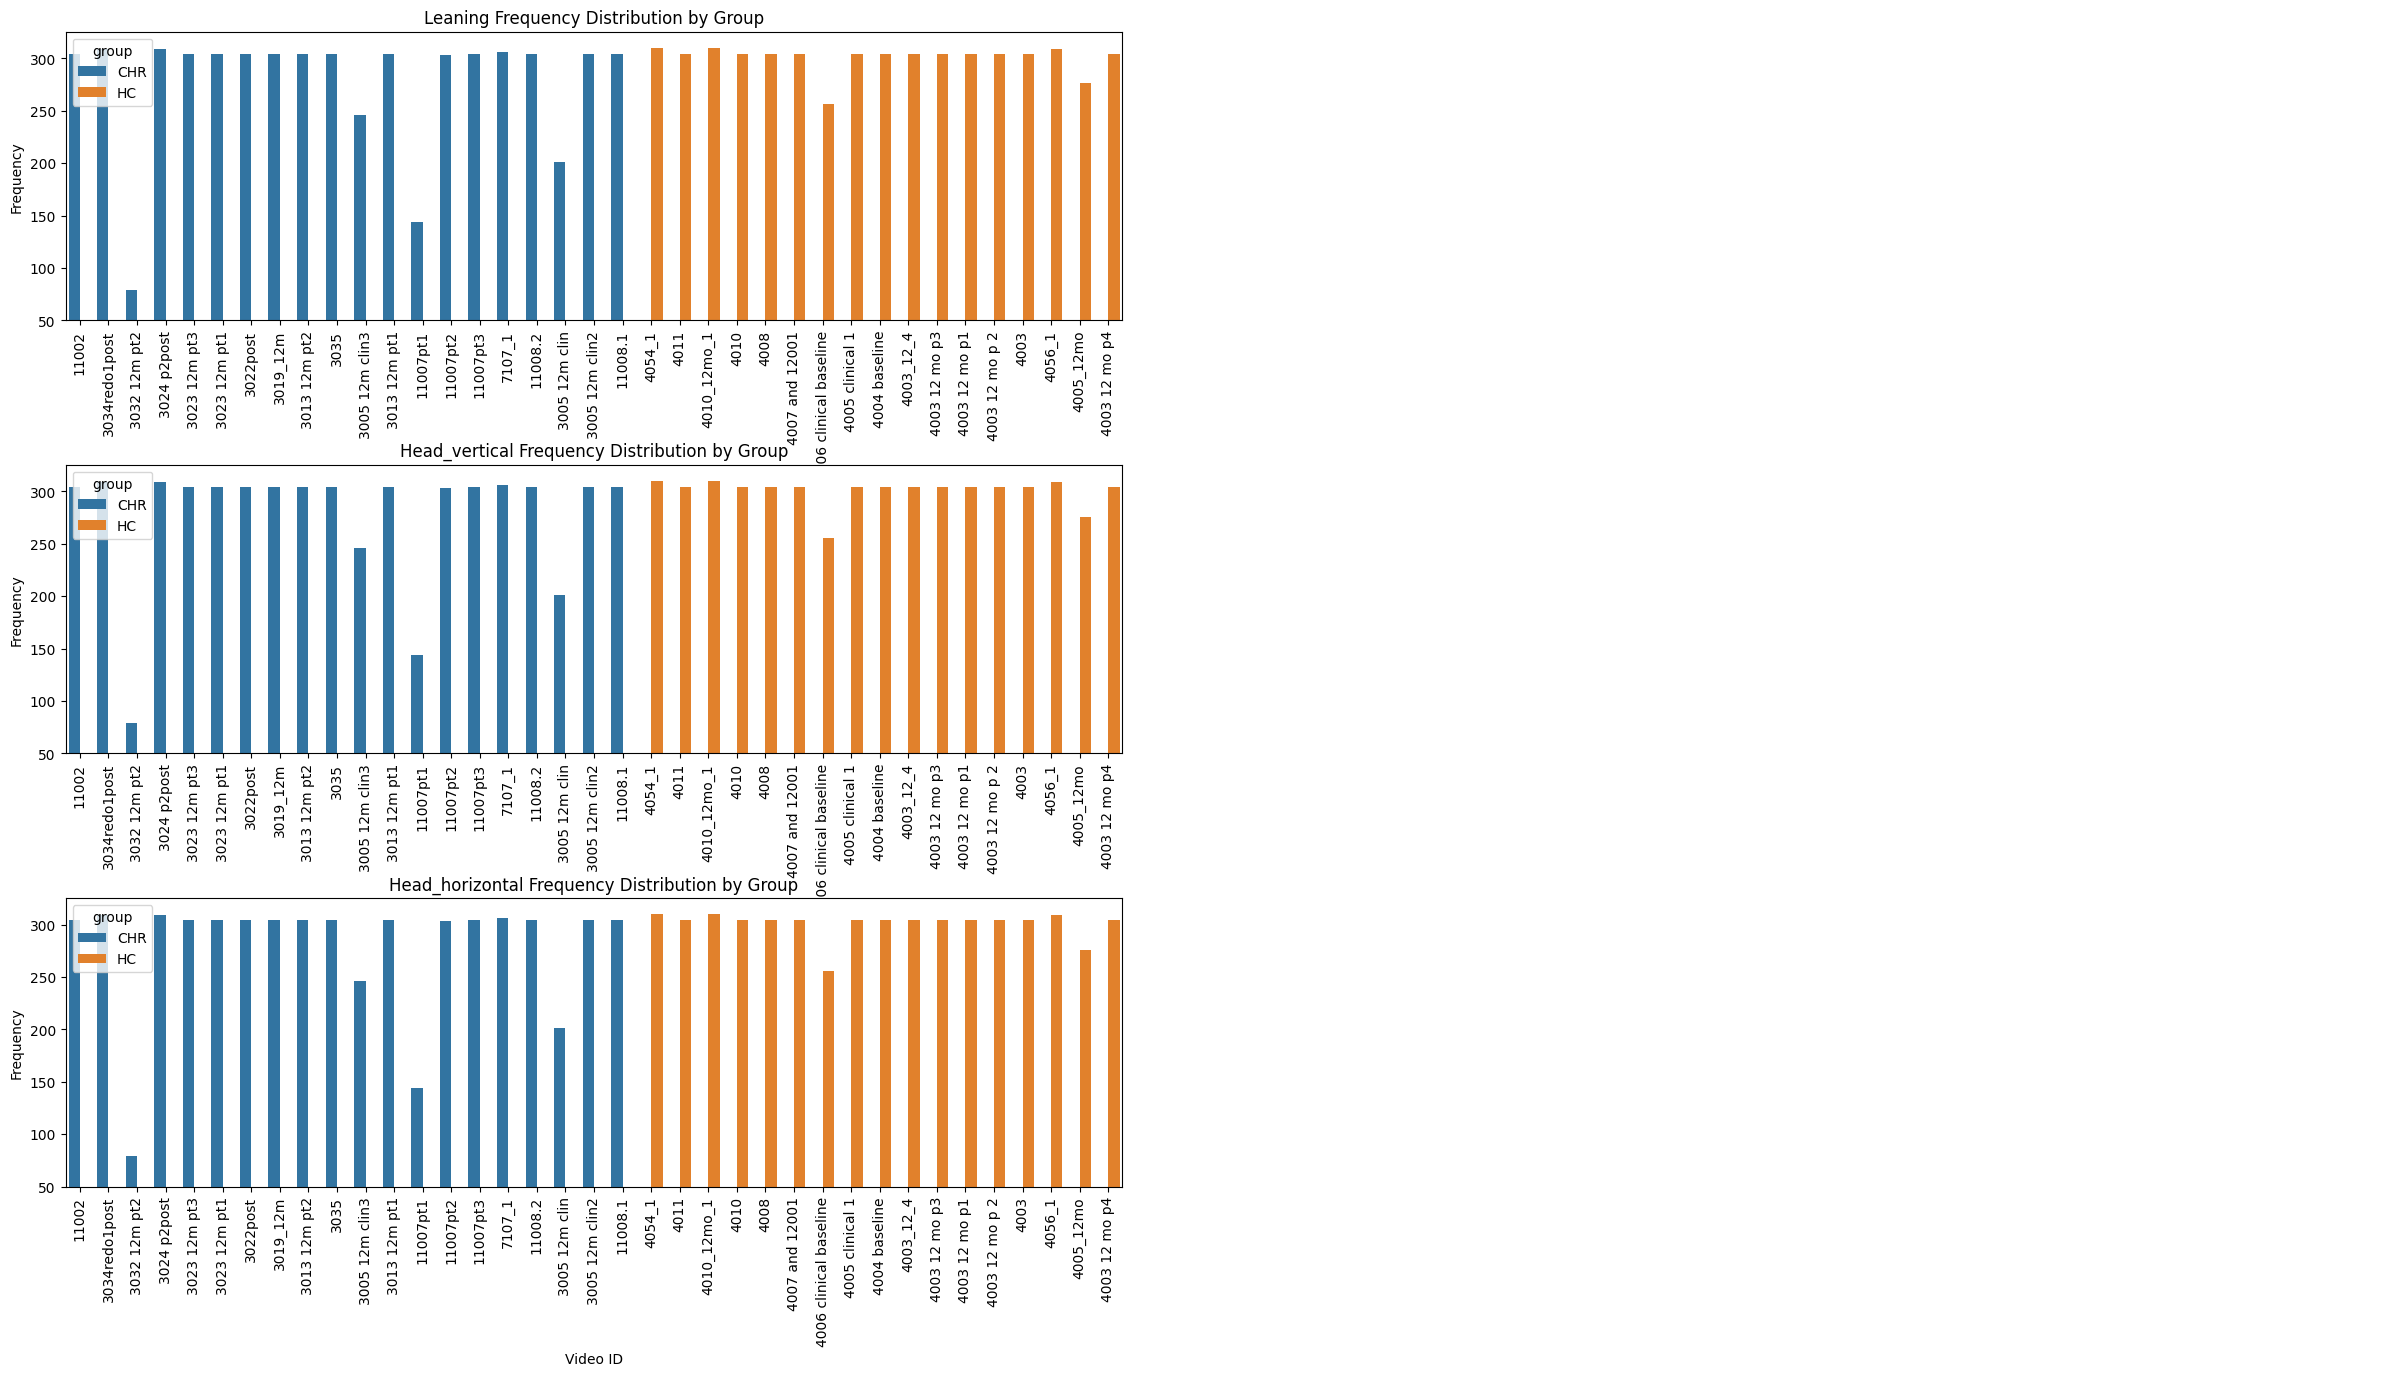

In [175]:
# Define the categorical features to analyze
categorical_features = ['leaning', 'head_vertical', 'head_horizontal']

# Create subplots for each categorical feature
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(30, len(categorical_features) * 5))

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    # Group data by video_id and group
    grouped_df = combined_df.groupby(['video_id', 'group'])[feature].count().reset_index()

    # Sort the dataframe to have CHR bars first and then HC bars
    grouped_df_sorted = grouped_df.sort_values(by=['group'], ascending=[True])

    # Plot frequency distribution for each video by group
    sns.barplot(data=grouped_df_sorted, x='video_id', y=feature, hue='group', ax=axes[i, 0])
    axes[i, 0].set_xlabel('Video ID')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title(f'{feature.capitalize()} Frequency Distribution by Group')
    axes[i, 0].set_ylim(50, None)  # Set the y-axis limits
    # Set x-axis tick labels
    axes[i, 0].set_xticklabels(grouped_df_sorted['video_id'].unique(), rotation=90)
    axes[i, 1].set_xticklabels(['CHR', 'HC'])

    # Remove the x-axis labels from the right subplot
    axes[i, 1].set_xlabel('')

    # Hide the right subplot
    axes[i, 1].spines['left'].set_visible(False)
    axes[i, 1].spines['right'].set_visible(False)
    axes[i, 1].spines['top'].set_visible(False)
    axes[i, 1].spines['bottom'].set_visible(False)
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


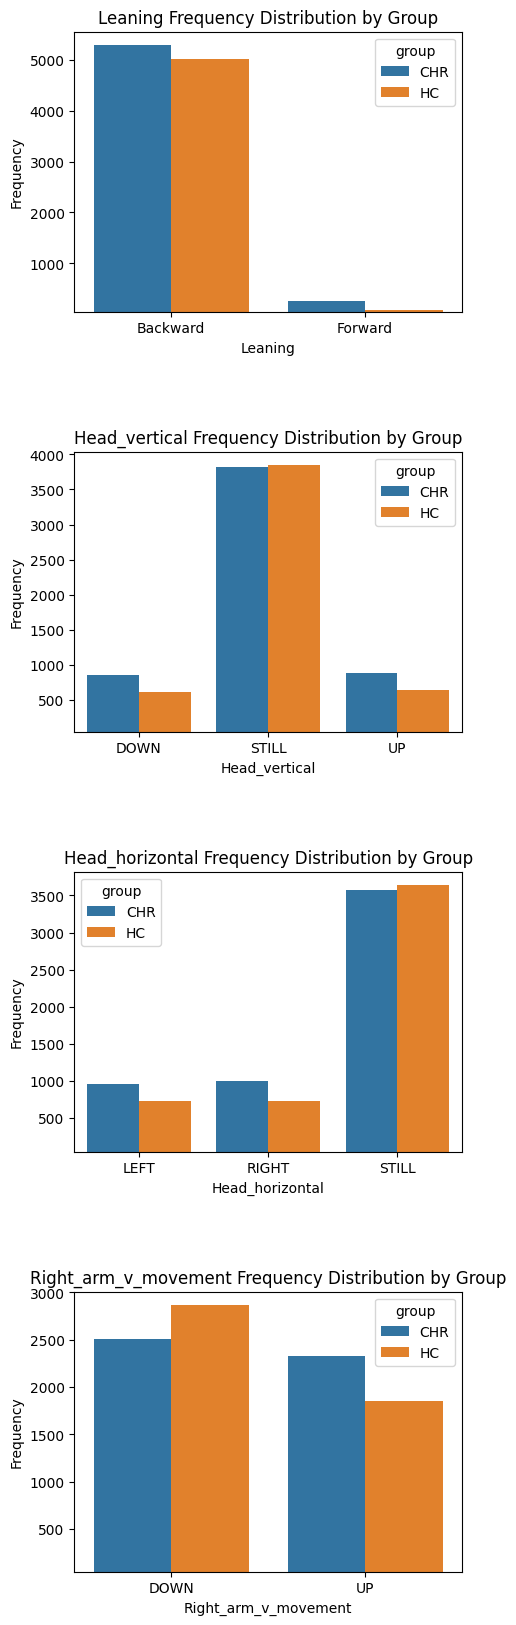

In [176]:
# Define the categorical features to analyze
categorical_features = ['leaning', 'head_vertical', 'head_horizontal', 'right_arm_v_movement']

# Create subplots for each categorical feature
fig, axes = plt.subplots(len(categorical_features), figsize=(5, len(categorical_features) * 5))

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    # Group data by group and feature count
    grouped_df = combined_df.groupby(['group', feature]).size().reset_index(name='count')

    # Plot frequency distribution by group
    sns.barplot(data=grouped_df, x=feature, y='count', hue='group', ax=axes[i])
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{feature.capitalize()} Frequency Distribution by Group')
    axes[i].set_ylim(50, None)  # Set the y-axis limits

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()
